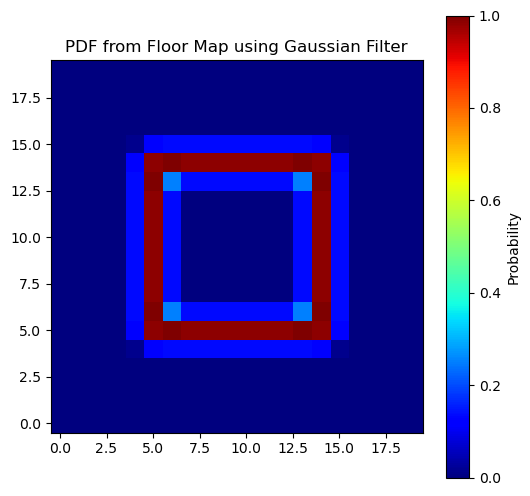

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.ndimage import gaussian_filter

# Step 1: Create an empty map
map_size = (20, 20) 
floor_map = np.zeros(map_size)

# Step 2: Define a corridor (a square line)
# We mark the border of a square with high values
floor_map[5, 5:15] = 10   # top horizontal line
floor_map[14, 5:15] = 10  # bottom horizontal line
floor_map[5:15, 5] = 10   # left vertical line
floor_map[5:15, 14] = 10  # right vertical line

# Step 3: Apply Gaussian filter to smooth the map
# This turns sharp lines into a probability distribution
pdf_map = gaussian_filter(floor_map, sigma=.5)

# Step 4: Normalize to get max probability = 1
pdf_map /= np.max(pdf_map)

# Step 5: Plot the probability map
plt.figure(figsize=(6,6))
plt.imshow(pdf_map, cmap=cm.jet, origin='lower')
plt.colorbar(label='Probability')
plt.title("PDF from Floor Map using Gaussian Filter")
plt.show()


In [ ]:
# this code is just to give you an idea, the output is not completely correct

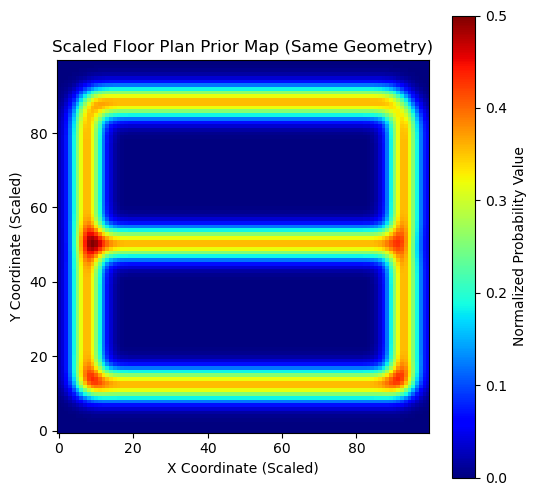

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Map dimensions and scaling factors derived from 
MAP_HEIGHT = 100
MAP_WIDTH = 100
Y_SCALE = MAP_HEIGHT / 3400.0
X_SCALE = MAP_WIDTH / 5200.0
SIGMA = 3  # Reduced proportionally from 50 for the smaller map

# 2. Create the empty map
floor_map = np.zeros((MAP_HEIGHT, MAP_WIDTH))

# New line segments (scaled and slightly thickened for visibility on 100x100 map):
line_segments_scaled = [
    # Horizontal lines
    (slice(12, 14), slice(8, 92)),
    (slice(50, 52), slice(8, 91)),
    (slice(88, 90), slice(8, 92)),

    # Vertical lines (Left and Right)
    (slice(12, 49), slice(7, 9)),
    (slice(12, 49), slice(92, 94)),

    (slice(51, 87), slice(7, 9)),
    (slice(51, 87), slice(92, 94)),

    # Additive lines to connect segments near Y=1700
    (slice(49, 50), slice(7, 9)),
    (slice(49, 50), slice(92, 94))
]

# 3. Draw the line segments on the map
DRAW_VALUE = 20
for y_slice, x_slice in line_segments_scaled:
    floor_map[y_slice, x_slice] = DRAW_VALUE

# 4. Apply the Gaussian filter (smoothing the lines)
smoothed_map = gaussian_filter(floor_map, sigma=SIGMA)

# 5. Normalize the map
max_val = np.amax(smoothed_map)
MAX_PROB_CAP = 0.5
final_prior_map = (smoothed_map / max_val) * MAX_PROB_CAP

# 6. Plot the final probability map
plt.figure(figsize=(6, 6))
plt.title("Scaled Floor Plan Prior Map (Same Geometry)")
plt.xlabel("X Coordinate (Scaled)")
plt.ylabel("Y Coordinate (Scaled)")
plt.imshow(final_prior_map, cmap='jet', origin='lower')
plt.colorbar(label='Normalized Probability Value')
plt.show()